## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

## DNC: Begin Part 1: Descriptive Statistics 

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

***

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
%matplotlib inline
from scipy import stats

In [2]:
# generate 10 uniform random number between 25.0 & 35.0
my_rand = np.random.uniform(25.0, 35.0, 10)
# store the random numbers into data frame
df = pd.DataFrame([my_rand])
np_std = np.std(df.loc[0])
pd_std = df.loc[0].std()
print("%s | %s" % (np_std, pd_std))

2.15840283358 | 2.27515635409


#### Citation: 
> _"Why Does Numpy Std() Give A Different Result To Matlab Std()?". Stackoverflow.com. N.p., 2017. Web. 31 Jan. 2017._

>_"Pandas.Dataframe.Std — Pandas 0.19.2 Documentation". Pandas.pydata.org. N.p., 2017. Web. 31 Jan. 2017._

<p>
    In numpy, the ``np.std`` calculation takes an optional parameter ddof: "Delta Degrees of Freedom". The default is 0. Whereas in ``pd.std``, the default ``ddof`` parameter is set to be 1.
</p>



In [3]:
np_std = np.std(df.loc[0],ddof=1) # set ddof=1 in numpy
pd_std = df.loc[0].std() # ddof = 1 default in pandas
print("numpy std = %s | pandas std = %s" % (np_std, pd_std)) # same result

numpy std = 2.27515635409 | pandas std = 2.27515635409


In [4]:
np_std = np.std(df.loc[0]) # ddof = 0 default in numpy
pd_std = df.loc[0].std(ddof=0) # set ddof=0 in pandas
print("numpy std = %s | pandas std = %s" % (np_std, pd_std)) # same result

numpy std = 2.15840283358 | pandas std = 2.15840283358


Set the sample size to be 1E6 and compare the ``std`` result

In [5]:
# generate 10 uniform random number between 25.0 & 35.0
my_rand = np.random.uniform(25.0, 35.0, int(1e6))
# store the random numbers into data frame
df = pd.DataFrame([my_rand])
np_std = np.std(df.loc[0])
pd_std = df.loc[0].std()
print("%s | %s" % (np_std, pd_std))

2.88555330736 | 2.88555475014


<p>
After we increase the sample sets, we can see that the computation result from ``pd.std`` has significantly approaching the result form ``np.std``. This is because the correction term or the Bessel's coefficient for numpy is N and pandas is N-1. When N is comparabally large, the standard deviation would not be affect by this changes.
</p>

<img src="biased std.png">``numpy.std`` or Biased std</img>
<img src="unbiased std.png">``pandas.std`` or Unbiased std</img>

* We can reset the ``ddof`` term to get the same result:

In [6]:
np_std = np.std(df.loc[0],ddof=1) # set ddof=1 in numpy
pd_std = df.loc[0].std() # ddof = 1 default in pandas
print("numpy std = %s | pandas std = %s" % (np_std, pd_std)) # same result

numpy std = 2.88555475014 | pandas std = 2.88555475014


In [7]:
np_std = np.std(df.loc[0]) # ddof = 0 default in numpy
pd_std = df.loc[0].std(ddof=0) # set ddof=0 in pandas
print("numpy std = %s | pandas std = %s" % (np_std, pd_std)) # same result

numpy std = 2.88555330736 | pandas std = 2.88555330736


***
#### 1-2: Box plots 

#### Citation
> "statistics example code: boxplot_color_demo.py — Matplotlib 2.0.0 documentation" http://matplotlib.org/examples/statistics/boxplot_color_demo.html (accessed Feb 1, 2017). 

> strptime http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html (accessed Feb 1, 2017).

> Box Plot: Display of Distribution http://www.physics.csbsju.edu/stats/box2.html (accessed Feb 1, 2017).

* Read data

In [198]:
energy_data = pd.read_csv('GerberdingElectricityChilledWater.csv', delimiter=',')
energy_data.head()

,DateTime,Btu,kWh
0,1/1/13 0:15,49664.0,19.69
1,1/1/13 0:30,90112.0,20.84
2,1/1/13 0:45,19968.0,17.42
3,1/1/13 1:00,50176.0,19.59
4,1/1/13 1:15,99840.0,20.46


#### Box plot of chilled water energy and electricity usage
* center red line represents the median of the data
* upper horizontal bar represents the maximum value of the data 
* lower horizontal bar represnets the minimum value of the data
* upper bondary of the box indicates the third quartile
* lower bondary of the box indicates the first quartile
* span of the box is the interquartile range or IQR

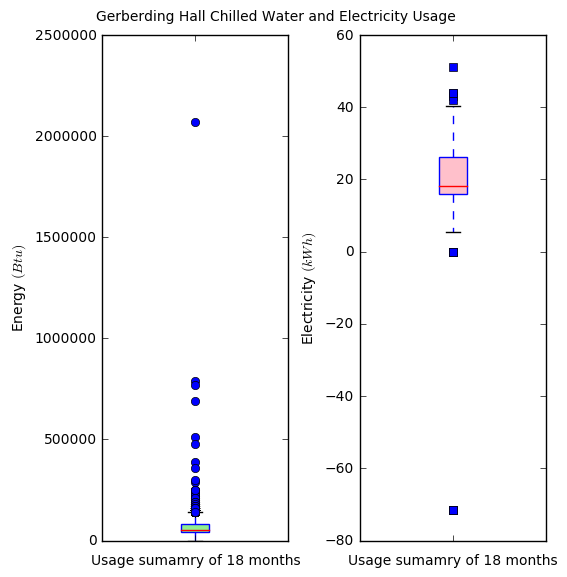

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
# plot the 1st box plot
box1 = axes[0].boxplot(energy_data['Btu'],0,'o',labels=[''],patch_artist=True)
# plot the 2nd box plot
box2 = axes[1].boxplot(energy_data['kWh'],0,'rs',labels=[''],patch_artist=True)
# change labels for the 1st box plot
axes[0].set_xlabel('Usage sumamry of 18 months')
axes[0].set_ylabel('Energy $(Btu)$')
# change labels for the 2nd box plot
axes[1].set_xlabel('Usage sumamry of 18 months')
axes[1].set_ylabel('Electricity $(kWh)$')
# add a title for both plots
fig.suptitle('Gerberding Hall Chilled Water and Electricity Usage' )
# change padding between plots
fig.tight_layout(pad=2.2, w_pad=0.6, h_pad=1)
# change color for the 1st box plot
colors = ['lightgreen']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
# change color for the second box plot
    colors = ['pink']
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)


## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

***

#### Part 3: Hypothesis testing


In [110]:
energyuse = pd.read_csv('energyuse.csv', delimiter=',')
energyuse

,Group,Lighting,Electricity,Total
0,A,0.451,1.270,1.721
1,B,1.033,1.769,2.801
2,C,0.410,1.629,2.040
3,D,0.708,1.633,2.341
4,E,2.317,0.725,3.042
5,F,1.601,0.634,2.235
6,National Avg,1.760,1.280,3.040
